In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
df_europe = pd.read_csv('/Users/sachintamangyonjan/Downloads/Europe Trip Analysis Python/destinations.csv', encoding= 'ISO-8859-1')

In [6]:
df_europe.head()

,Destination,Region,Country,Category,Latitude,Longitude,Approximate Annual Tourists,Currency,Majority Religion,Famous Foods,Language,Best Time to Visit,Cost of Living,Safety,Cultural Significance,Description
0,Rome,Lazio,Italy,City,41.902782,12.496366,14 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",Italian,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch out for pickpockets","The capital city, known for its historical lan...","A hub of ancient history and modern culture, w..."
1,Florence,Tuscany,Italy,City,43.769581,11.255772,10 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",Italian,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch out for pickpockets","A Renaissance city famous for its art, archite...","Home to world-class museums, including the Uff..."
2,Venice,Veneto,Italy,City,45.435559,12.336196,10 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",Italian,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch out for pickpockets","A unique city built on canals, known for its g...","An iconic city of water, renowned for romantic..."
3,Milan,Lombardy,Italy,City,45.464643,9.188540,7 million,Euro,Roman Catholic,"Risotto, Ossobuco, Panettone",Italian,Spring (April-May) or Fall (Sept-Oct),High,"Generally safe, but watch out for pickpockets","A fashion capital known for its shopping, muse...","A modern city with an ancient soul, featuring ..."
4,Naples,Campania,Italy,City,40.851330,14.254720,5 million,Euro,Roman Catholic,"Pizza, Pasta, Cannoli",Italian,Spring (April-May) or Fall (Sept-Oct),Medium,"Generally safe, but be aware of pickpockets","A vibrant city known for its delicious food, h...","Famous for pizza, Pompeii, and proximity to th..."


In [7]:
# Checking data info
df_europe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination                  209 non-null    object 
 1   Region                       209 non-null    object 
 2   Country                      209 non-null    object 
 3   Category                     209 non-null    object 
 4   Latitude                     209 non-null    float64
 5   Longitude                    209 non-null    float64
 6   Approximate Annual Tourists  209 non-null    object 
 7   Currency                     209 non-null    object 
 8   Majority Religion            209 non-null    object 
 9   Famous Foods                 209 non-null    object 
 10  Language                     209 non-null    object 
 11  Best Time to Visit           209 non-null    object 
 12  Cost of Living               209 non-null    object 
 13  Safety              

In [9]:
# Checking null values in the dataset
df_europe.isnull().sum()

Destination                     0
Region                          0
Country                         0
Category                        0
Latitude                        0
Longitude                       0
Approximate Annual Tourists     0
Currency                        0
Majority Religion               0
Famous Foods                    0
Language                        0
Best Time to Visit              0
Cost of Living                  0
Safety                          0
Cultural Significance           0
Description                    50
dtype: int64

In [10]:
# Replacing null values with random description
df_europe['Description'].fillna('No Description', inplace= True)


In [12]:
# Checking for null values again
df_europe.isnull().sum()

Destination                    0
Region                         0
Country                        0
Category                       0
Latitude                       0
Longitude                      0
Approximate Annual Tourists    0
Currency                       0
Majority Religion              0
Famous Foods                   0
Language                       0
Best Time to Visit             0
Cost of Living                 0
Safety                         0
Cultural Significance          0
Description                    0
dtype: int64

In [19]:
# Checking total unique values in every columns
df_europe.nunique()

Destination                    208
Region                         138
Country                         21
Category                        49
Latitude                       182
Longitude                      184
Approximate Annual Tourists     35
Currency                        12
Majority Religion               10
Famous Foods                    66
Language                        27
Best Time to Visit              14
Cost of Living                   6
Safety                           9
Cultural Significance          208
Description                    160
dtype: int64

In [20]:
# Checking unique languages spoken across the destinations
df_europe['Language'].unique()

array(['Italian', 'Spanish', 'Spanish (and Basque)', 'French',
       'French (and German)', 'German', 'Dutch, French', 'Danish',
       'French, Mon\x82gasque', 'Russian', 'Russian, Tatar', 'Greek',
       'Portuguese', 'Norwegian', 'Swedish', 'German, French, Italian',
       'French, German', 'German, French', 'Turkish', 'Ukrainian',
       'English', 'English, Scottish Gaelic',
       'Luxembourgish, French, German', 'Maltese, English', 'Icelandic',
       'Serbian', 'Serbian, Hungarian'], dtype=object)

In [21]:
# List of different countries as destinations
df_europe['Country'].unique()

array(['Italy', 'Spain', 'France', 'Austria', 'Belgium', 'Denmark',
       'Germany', 'Monaco', 'Russia', 'Greece', 'Portugal', 'Norway',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'Luxembourg', 'Malta', 'Iceland', 'Serbia'], dtype=object)

In [22]:
df_europe['Currency'].value_counts()

Currency
Euro                            90
Euro (EUR)                      19
Danish krone (DKK)              10
Russian Ruble (RUB)             10
Norwegian krone (NOK)           10
Swedish krona (SEK)             10
Swiss franc (CHF)               10
Turkish lira (TRY)              10
Ukrainian hryvnia (UAH)         10
British Pound Sterling (GBP)    10
Icelandic kr¢na (ISK)           10
Serbian dinar (RSD)             10
Name: count, dtype: int64

In [25]:
# We found two different styles for same currency i.e. Euro. So, we can fix it.
df_europe['Currency'] =  df_europe['Currency'].replace('Euro (EUR)','Euro')
df_europe['Currency'].value_counts()

Currency
Euro                            109
Danish krone (DKK)               10
Russian Ruble (RUB)              10
Norwegian krone (NOK)            10
Swedish krona (SEK)              10
Swiss franc (CHF)                10
Turkish lira (TRY)               10
Ukrainian hryvnia (UAH)          10
British Pound Sterling (GBP)     10
Icelandic kr¢na (ISK)            10
Serbian dinar (RSD)              10
Name: count, dtype: int64

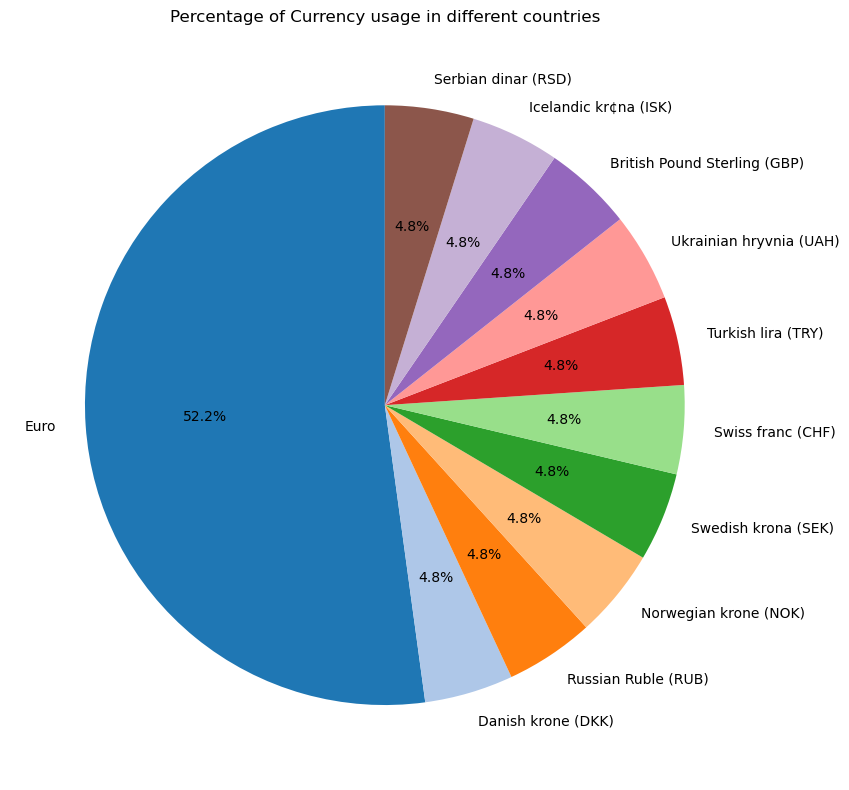

In [36]:
# Now we can plot to see the descripancies of currency
plt.figure(figsize= (10, 8))

df_europe['Currency'].value_counts().plot(
    kind = 'pie',
    autopct = '%1.1f%%',        # Display Percentage
    startangle = 90,            # Start at 90 degree to make it visually balanced
    colors = plt.get_cmap('tab20').colors       #Use distinct colors from a colormap
    )  



plt.title('Percentage of Currency usage in different countries')
plt.ylabel('')

plt.tight_layout()

plt.show()

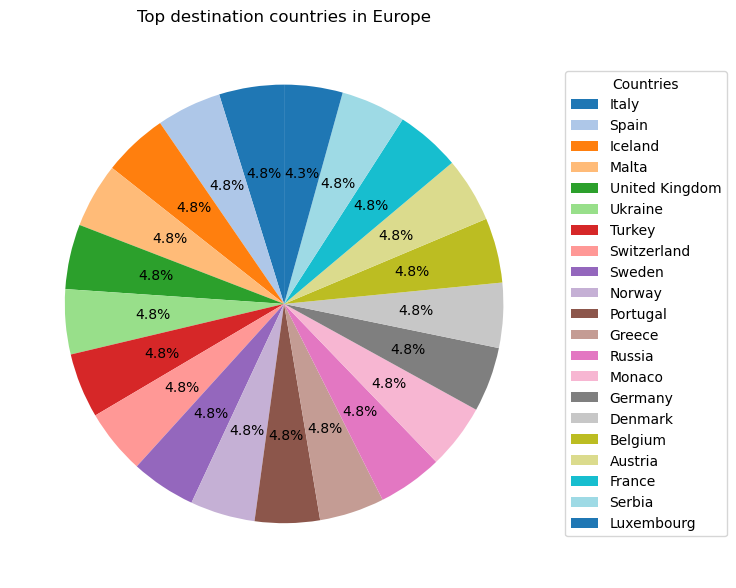

In [61]:
# Checking destination count in relation to countries

plt.figure(figsize= (8,6))
df_europe['Country'].value_counts().plot(
    kind = 'pie',
    startangle = 90,
    autopct = '%1.1f%%',
    colors= plt.get_cmap('tab20').colors,
    labels = None       # This removes labels from around the pie chart
)

plt.title('Top destination countries in Europe')
# Writing Country names in Legend space ( Looks better without this effect, but this can be reference for other projects)
plt.legend(labels = df_europe['Country'].value_counts().index, title = 'Countries', loc = 'center left', bbox_to_anchor = (1,0.5))

plt.xticks(rotation = 60)
plt.tight_layout()
plt.ylabel('')
plt.show()

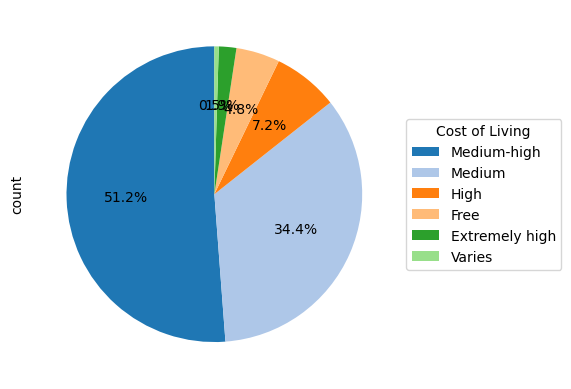

In [68]:
# Comparing cost of living discrepancies (Bar graph is a better option for this)
df_europe['Cost of Living'].value_counts().plot(
    kind = 'pie',
    startangle = 90,
    autopct = '%1.1f%%',
    labels = None,
    colors = plt.get_cmap('tab20').colors
)

plt.legend(labels = df_europe['Cost of Living'].value_counts().index, title = 'Cost of Living', loc = 'center left', bbox_to_anchor = (1,0.5))

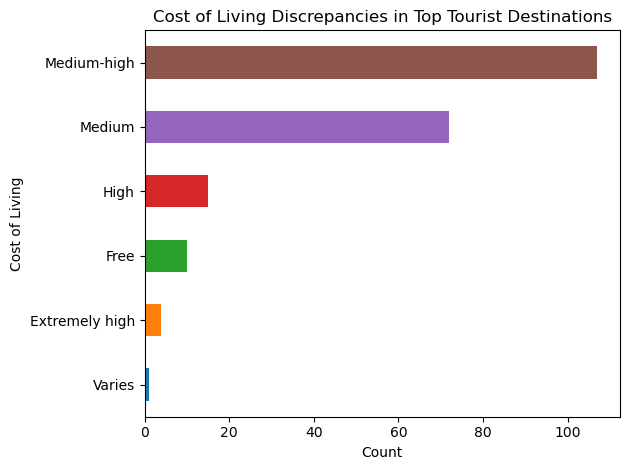

In [80]:
# Above visualization but in a bar graph
df_europe['Cost of Living'].value_counts(ascending= True).plot(
    kind = 'barh',
    color = plt.get_cmap('tab10').colors
)
plt.title('Cost of Living Discrepancies in Top Tourist Destinations')
plt.xlabel('Count')
plt.tight_layout()

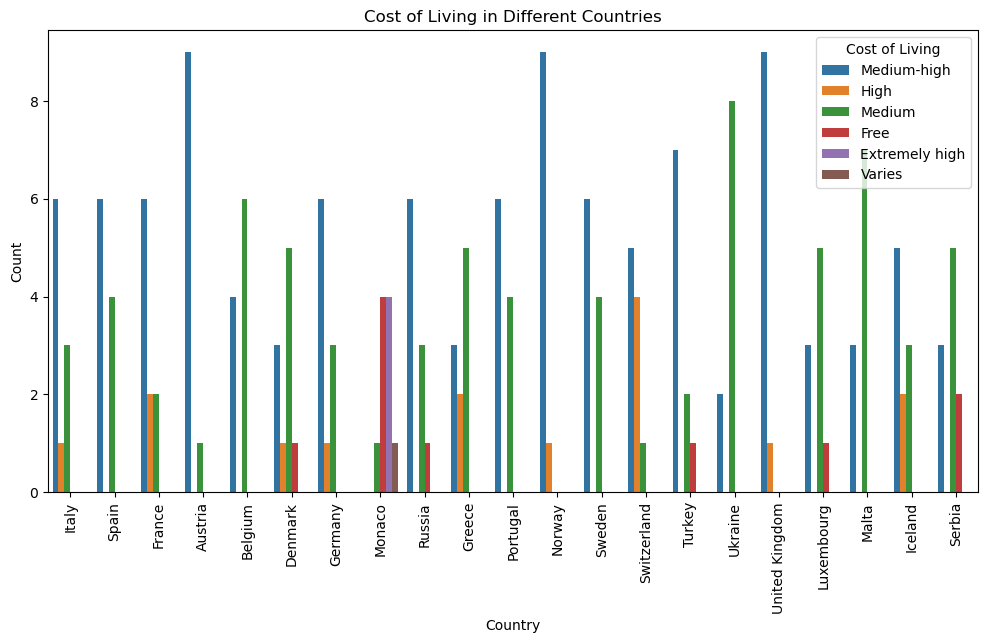

In [85]:
# Overall Cost of Living in different Countries
plt.figure(figsize=(12, 6))

sns.countplot(x='Country', hue='Cost of Living', data=df_europe)

plt.title('Cost of Living in Different Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Cost of Living')
plt.show()

Text(137.64444444444445, 0.5, '')

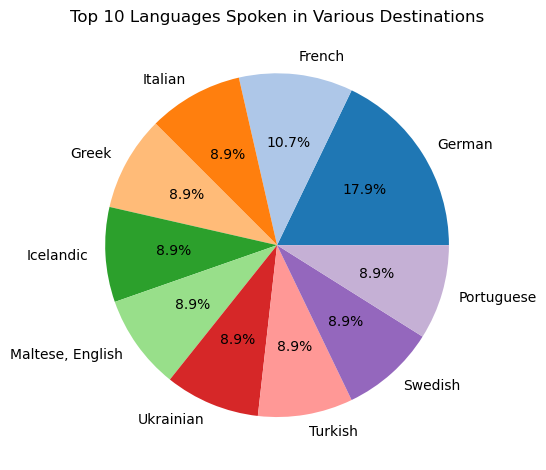

In [90]:
# Top 10 languages spoken in different destinations
df_europe['Language'].value_counts().head(10).plot(
    kind = 'pie',
    colors = plt.get_cmap('tab20').colors,
    autopct = '%1.1f%%'
)
plt.title('Top 10 Languages Spoken in Various Destinations')
plt.tight_layout()
plt.ylabel('')



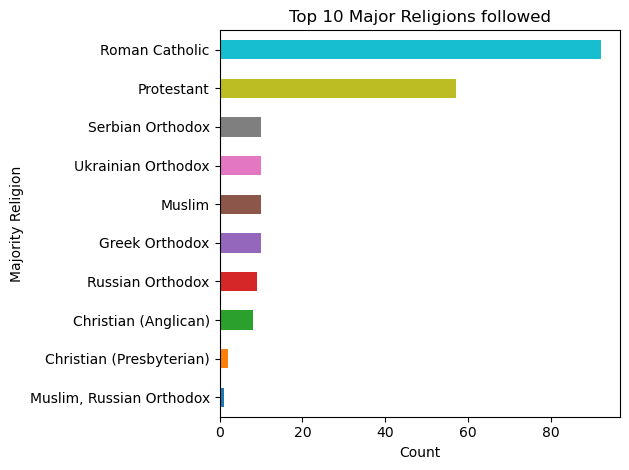

In [98]:
# Top 10 Major Religions followed in different destinations
df_europe['Majority Religion'].value_counts(ascending= True).head(10).plot(
    kind = 'barh',
    color = plt.get_cmap('tab10').colors   
)

plt.title('Top 10 Major Religions followed')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

In [103]:
# Famous foods in Europe
df_europe['Famous Foods'].value_counts()

Famous Foods
?evapi, Pljeskavica, Sarma                       10
Waffles, Belgian Fries, Chocolate                10
Fish, Lamb, Skyr                                 10
Pastizzi, Rabbit Stew, Imqaret                   10
Borscht, Varenyky, Salo                          10
                                                 ..
Weiáwurst, Brezn, Leberkse                       1
Frankfurter Kranz, Apfelwein, Grne Soáe          1
Klsch, Himmel un d, Sauerbraten                1
Fischbrtchen, Labskaus, Rote Grtze              1
Dresdner Stollen, Eierschecke, Kartoffelsalat     1
Name: count, Length: 66, dtype: int64

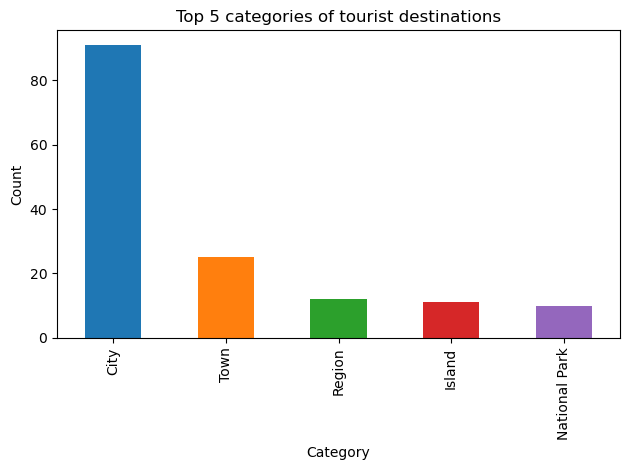

In [109]:
# Top 5 categories of tourist destinations
df_europe['Category'].value_counts().head().plot(
    kind = 'bar',
    color = plt.get_cmap('tab10').colors
)
plt.ylabel('Count')
plt.title('Top 5 categories of tourist destinations')
plt.tight_layout()
plt.show()
